In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [16]:
from scipy import stats

# Hypothesis about a population mean, z Statistic (sigma known) <br>

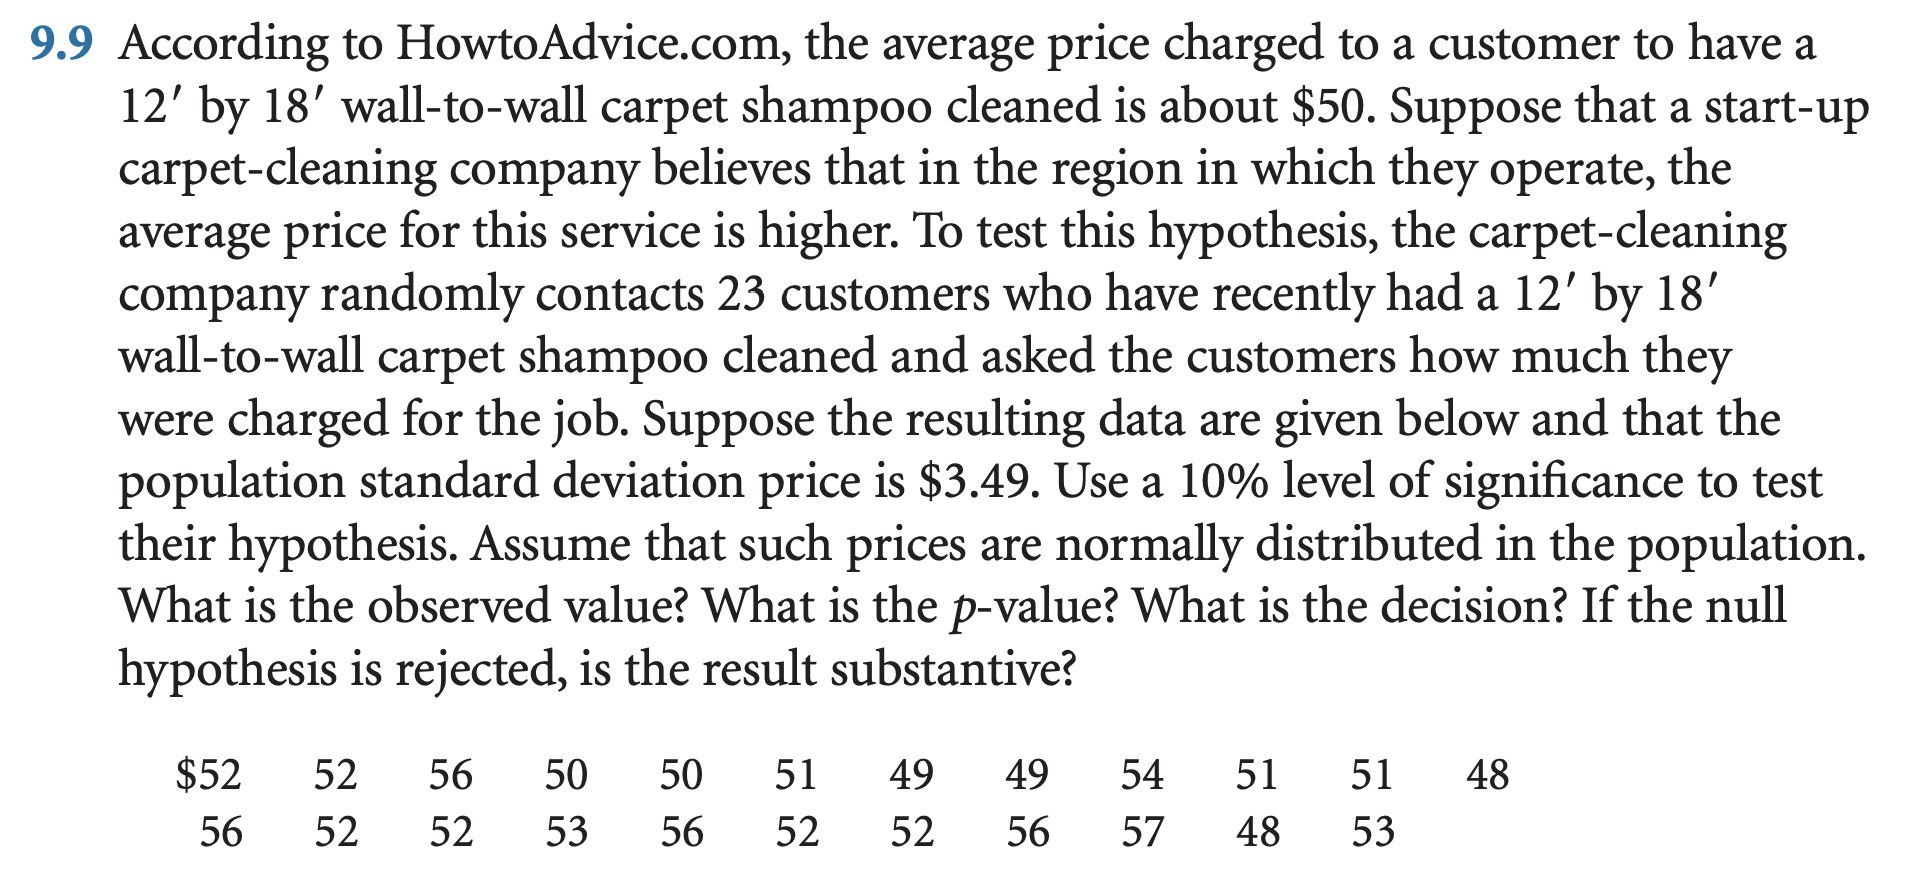

In [2]:
Image('./images/hypothesis1.png')

H0: mu = 50<br>
H1: mu > 50

In [8]:
prices = np.array([52,52,56,50,50,51,49,49,54,51,51,48,
          56,52,52,53,56,52,52,56,57,48,53])

In [9]:
mu = 50

In [10]:
n = 23

In [11]:
sigma = 3.49

In [15]:
alpha = 0.1

## approach 1

In [17]:
z_alpha_2 = stats.norm.ppf(0.9)

In [20]:
threshold = z_alpha_2*(sigma/np.sqrt(n))+50
threshold

50.932604688469375

In [22]:
observed_value = prices.mean()
observed_value

52.17391304347826

**as the observed value is greater than the threshold value we will reject H0.**

## approach 2

In [23]:
z = (observed_value - mu)/(sigma/np.sqrt(n))
z

2.9873125223076573

In [24]:
z_critical = stats.norm.ppf(0.9)
z_critical

1.2815515655446004

**calculated test statistic is greater that z_critical so we reject H0**

## approach 3

In [25]:
z = (observed_value - mu)/(sigma/np.sqrt(n))
z

2.9873125223076573

In [27]:
p_value = 1-stats.norm.cdf(z)
p_value

0.0014072092702339667

**p value is less than the level of significance (0.1) therefore we reject H0**

# Hypothesis about a population mean, t Statistic (sigma unknown) <br>

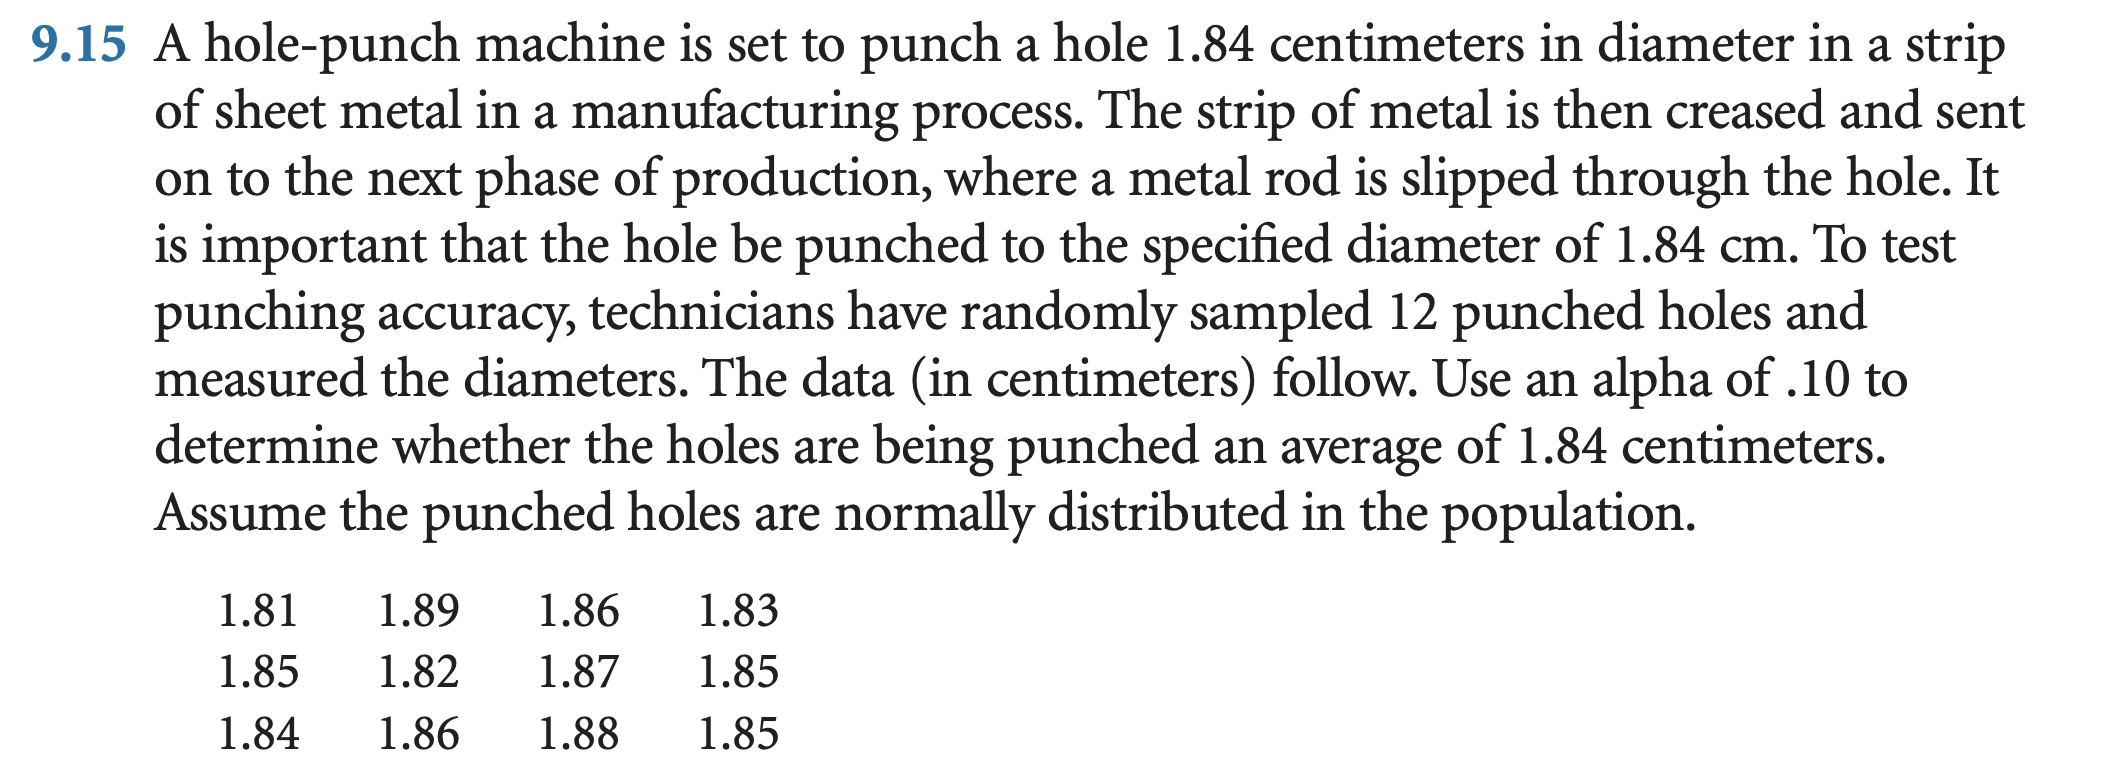

In [3]:
Image('./images/hypothesis2.png')

H0: mu = 1.84<br>
Ha: mu != 1.84

In [37]:
diameters = np.array([1.81,1.89,1.86,1.83,
                      1.85,1.82,1.87,1.85,
                      1.84,1.86,1.88,1.85])

In [38]:
mu = 1.84

In [39]:
n = 12

In [40]:
df = n-1

In [41]:
alpha = 0.1

In [42]:
observed_value = diameters.mean()

In [43]:
s = diameters.std(ddof=1)

In [44]:
test_statistic = (observed_value-mu)/(s/np.sqrt(n))
test_statistic

1.5947073886035412

In [45]:
p_value = stats.t.cdf(-test_statistic,df)+(1-stats.t.cdf(test_statistic,df))
p_value

0.1390844045839594

**p value is greater than the level of significance so we fail to reject H0**

# Testing Hypothesis About A Proportion

A large manufacturing company investigated the service it received from suppliers<br>and discovered that, in the past, 32% of all materials shipments were received late.<br>
<br>
However, the company recently installed a just-in-time system in which suppliers<br>are linked more closely to the manufacturing process. A random sample of 118<br>deliveries since the just-in-time system was installed reveals that 22 deliveries were<br>late. Use this sample information to test whether the proportion of late deliveries<br>
was reduced significantly. Let aplha = 0.05

H0: p=0.32<br>
Ha: p<0.32

In [47]:
p = 0.32
q = 1-p
n = 118
p_hat = 22/118
alpha = 0.05

In [48]:
n*p>5

True

In [49]:
n*q>5

True

In [50]:
test_statistic = (p_hat - p)/np.sqrt(p*q/n)
test_statistic

-3.110181716407063

In [52]:
p_value = stats.norm.cdf(test_statistic)
p_value

0.0009348613966112

**p value is less than the level of significance hence we reject H0**

# Testing Hypothesis about a variance

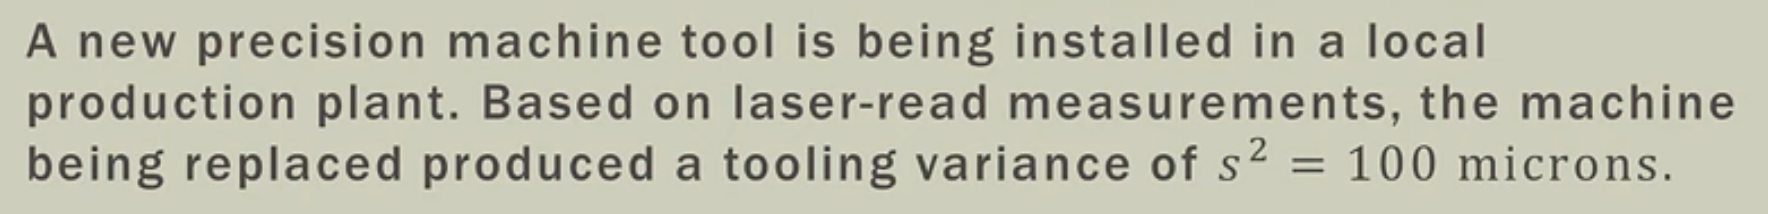

In [4]:
Image('./images/hypothesis3.png')

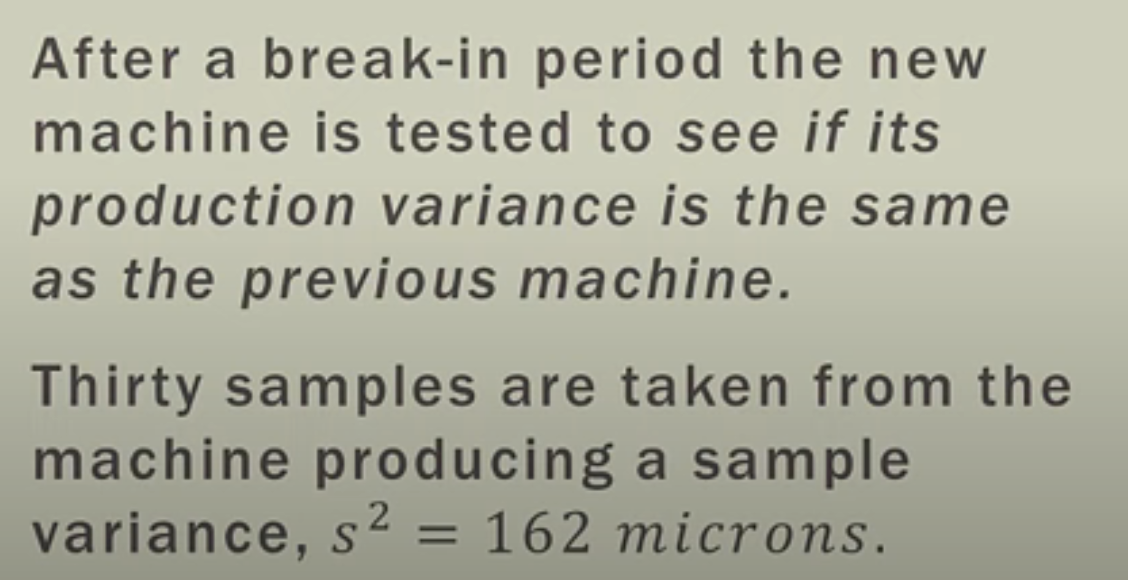

In [5]:
Image('./images/hypothesis4.png')

H0: variance = 100<br>
Ha: variance > 100<br>
let's assume alpha = 0.05

In [70]:
h0_variance = 100
observed_variance = 162
n = 30
df = n-1
alpha = 0.05

In [89]:
critical_value = stats.chi2.ppf(1-alpha,df)
critical_value

42.55696780429269

In [90]:
test_statistic = df*observed_variance/h0_variance
test_statistic

46.98

The sample data does offer sufficient evidence to conclude<br>
the production variance of the new variance is higher than that<br>
of the provious machine. Recalibration/repair of the new machine may be necessary.

In [91]:
p_value = 1-stats.chi2.cdf(test_statistic,df)
p_value

0.018704373832863164

# Type II Error

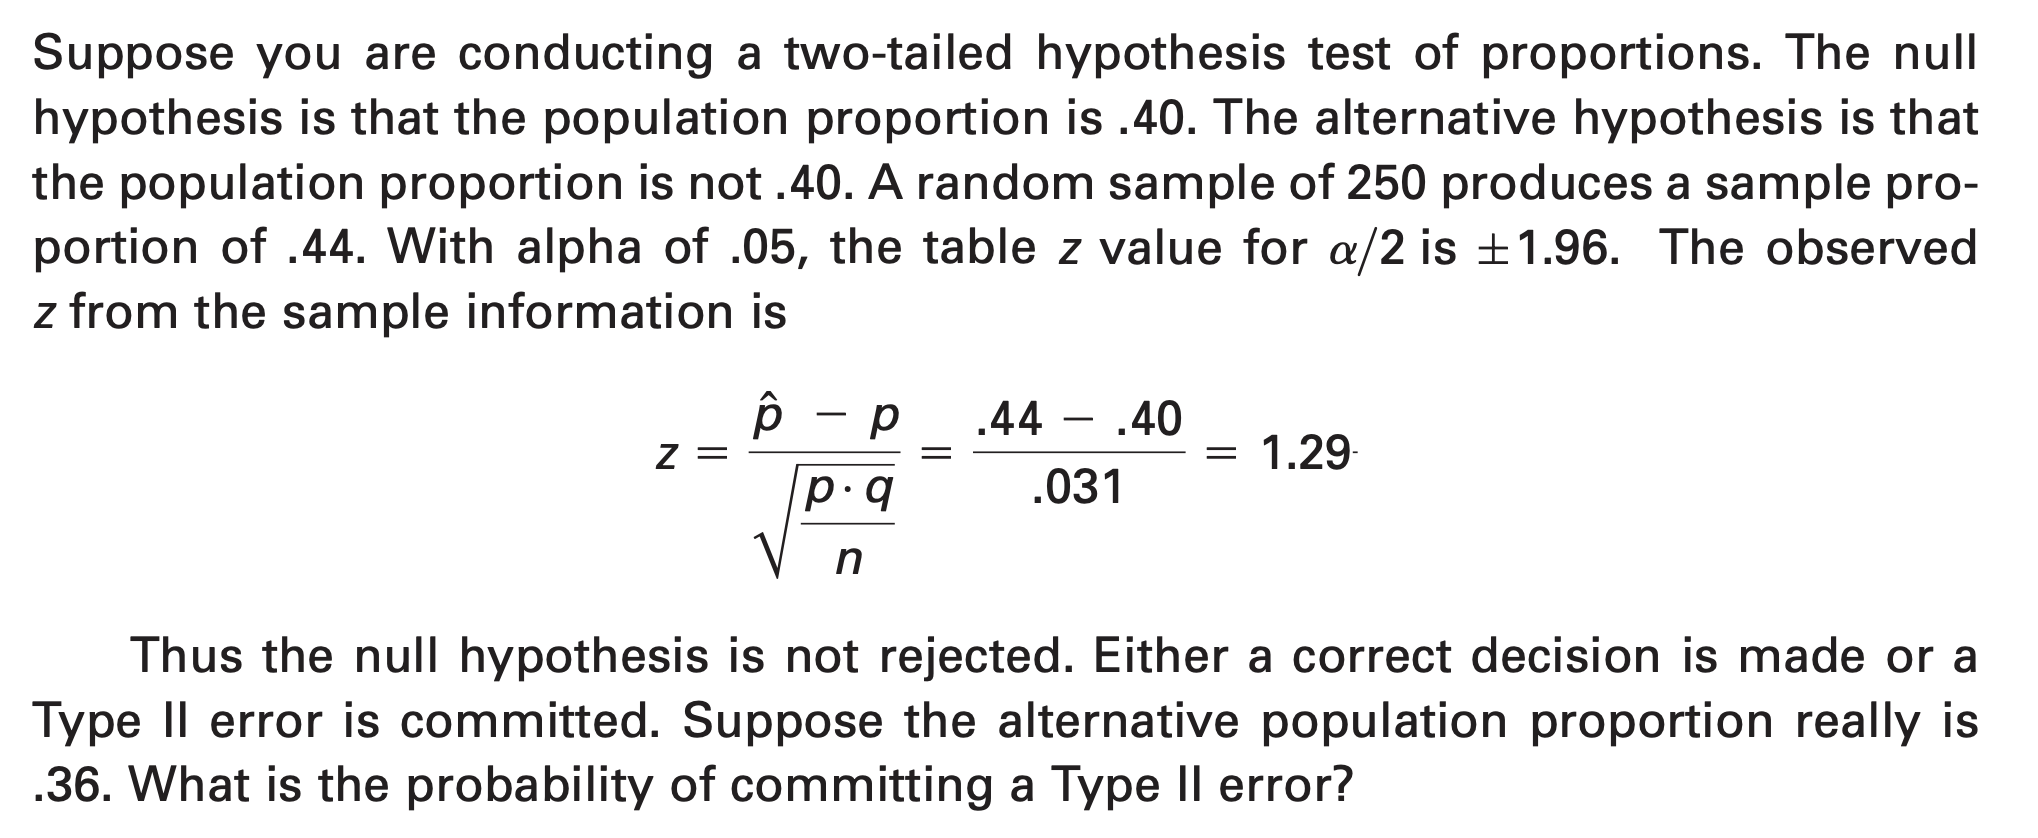

In [6]:
Image('./images/hypothesis5.png')

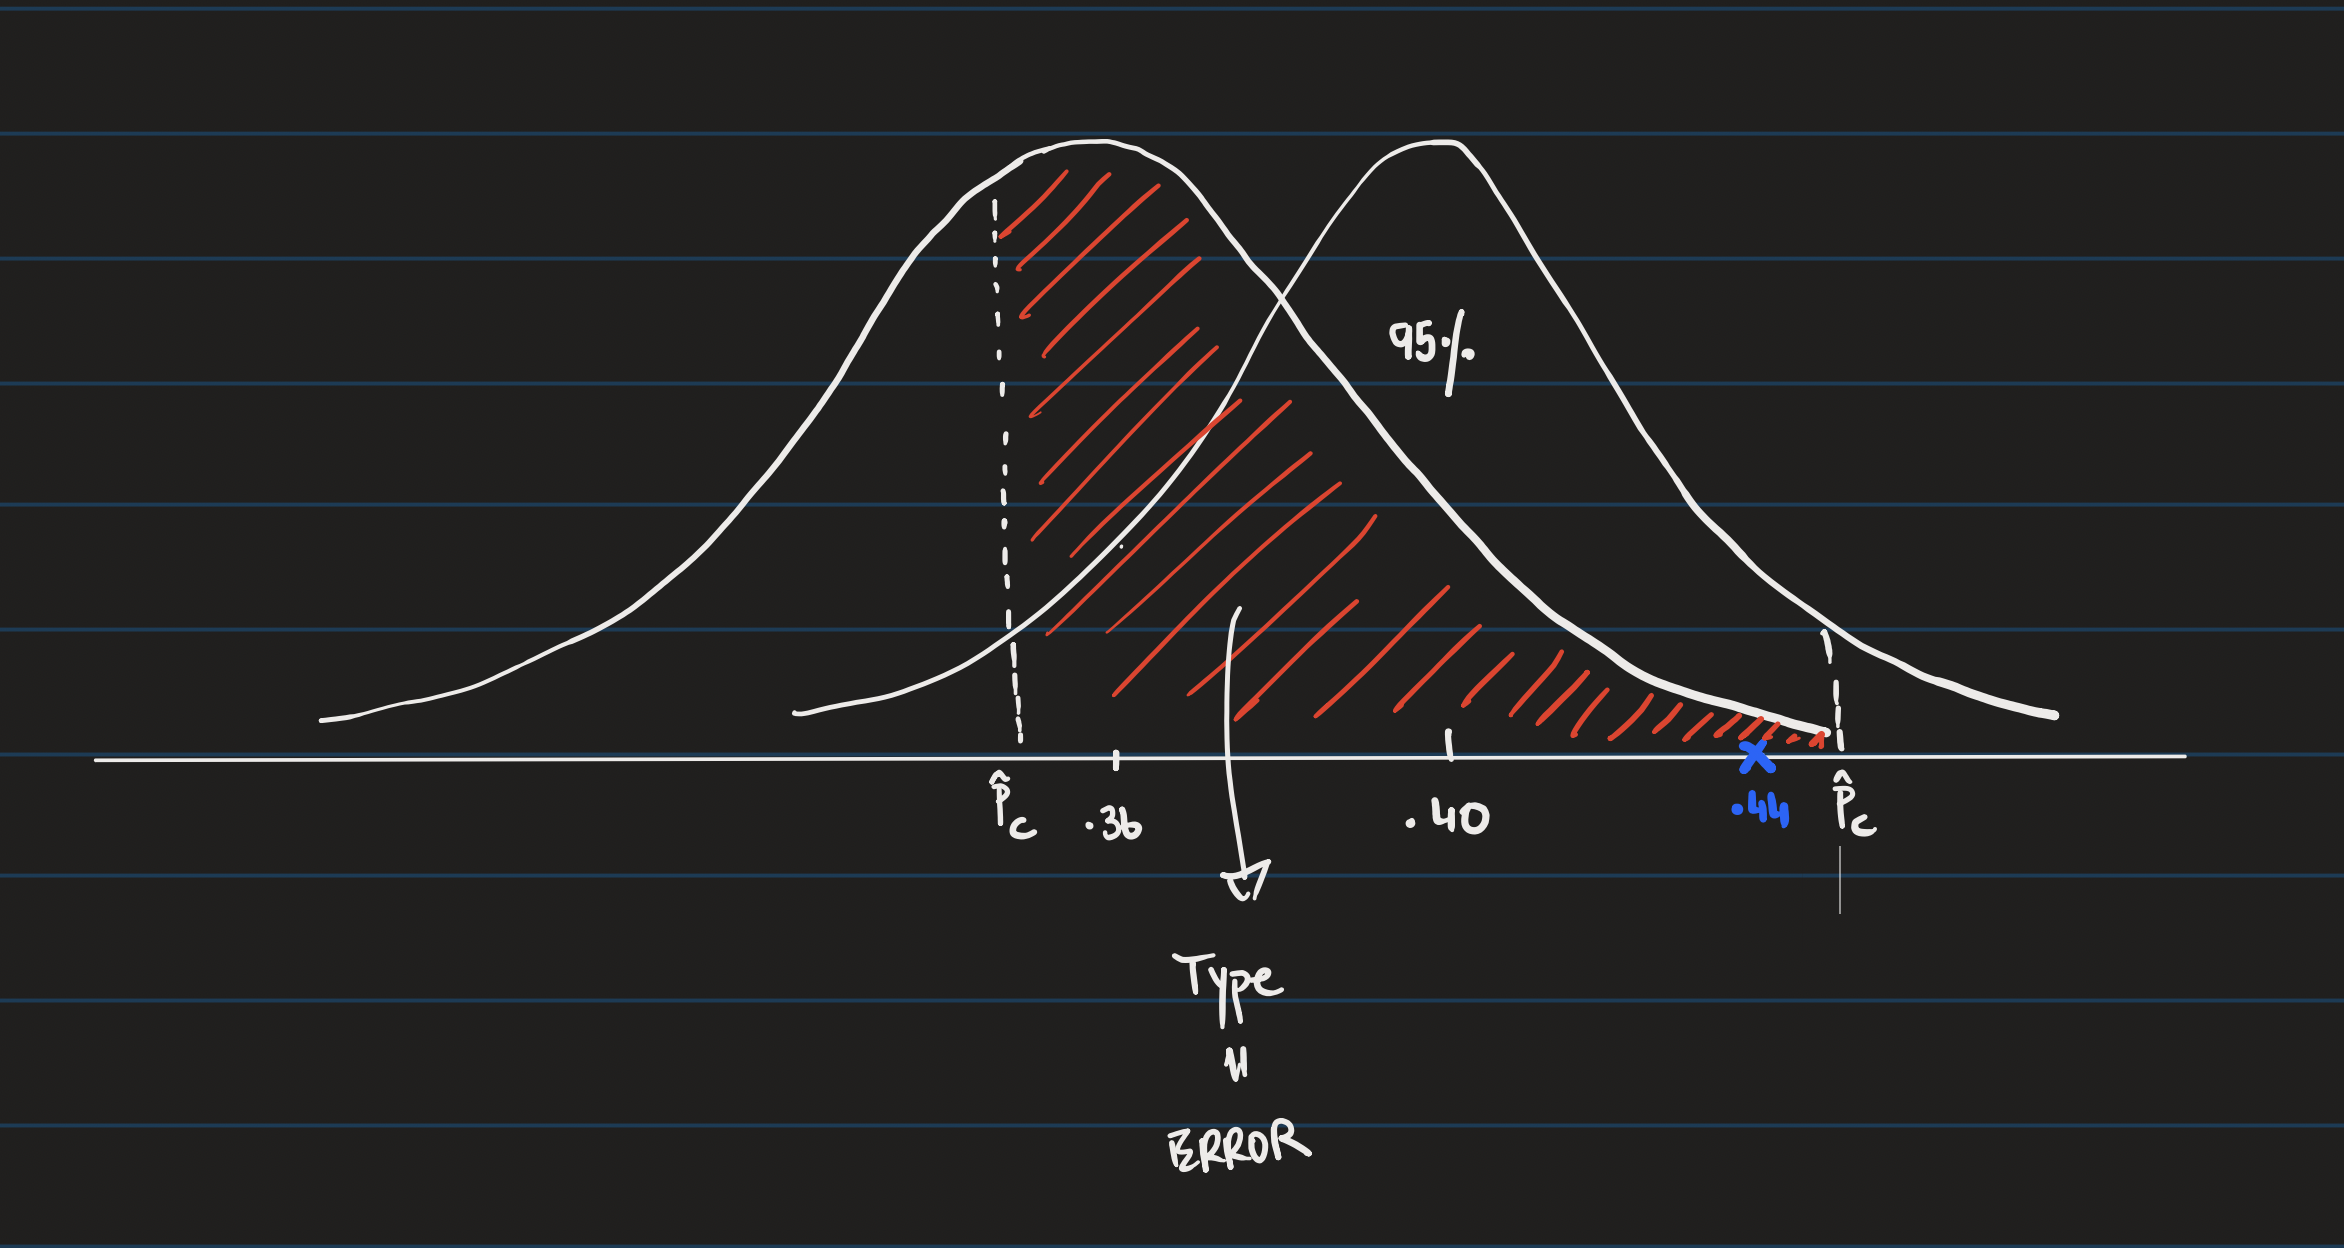

In [7]:
Image('./images/hypothesis6.png')

With two-tailed tests, both tails of the distribution contain rejection regions.<br>
The area between the two tails is the nonrejection region and the region where<br>
Type II errors can occur

1. Find the critical values

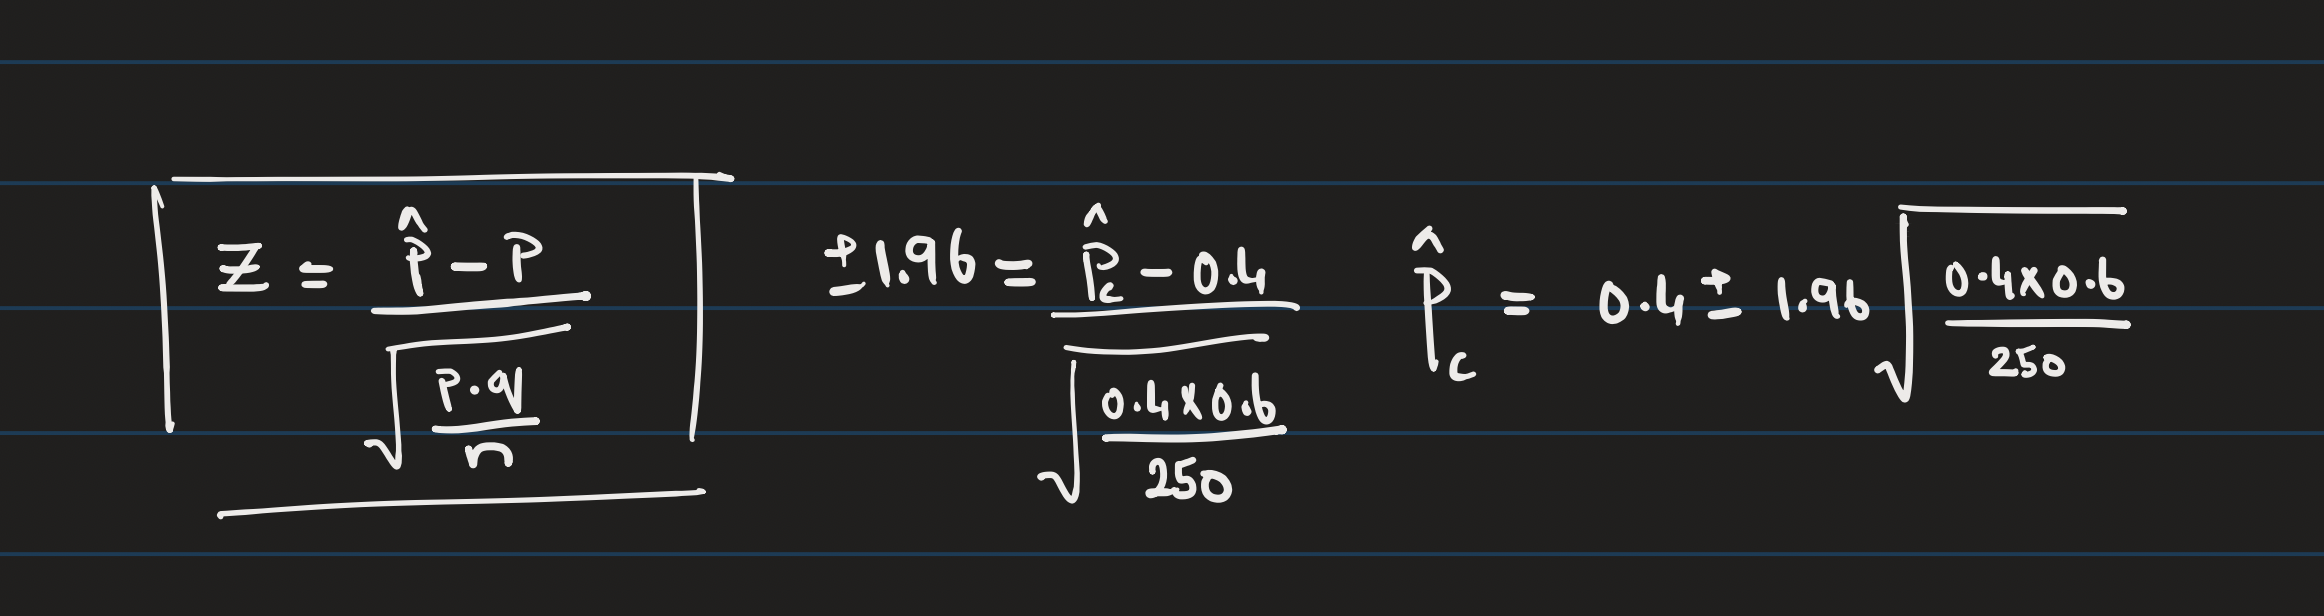

In [8]:
Image('./images/hypothesis7.png')

In [114]:
p_c1 = round(0.4 - 1.96*np.sqrt(0.4*0.6/250),2)
p_c1

0.34

In [115]:
p_c2 = round(0.4 + 1.96*np.sqrt(0.4*0.6/250),2)
p_c2

0.46

let's use the z formula to calculate the area

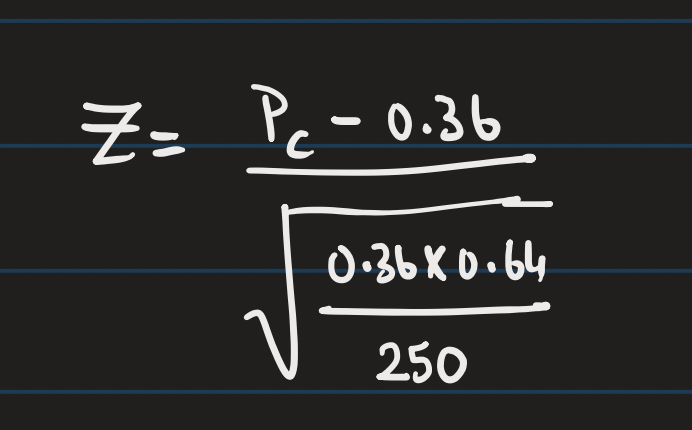

In [9]:
Image('./images/hypothesis8.png')

In [116]:
z1 = round((p_c1-0.36)/np.sqrt(0.36*0.64/250),2)
z1

-0.66

In [117]:
z2 = round((p_c2-0.36)/np.sqrt(0.36*0.64/250),2)
z2

3.29

In [118]:
round(stats.norm.cdf(z2)-stats.norm.cdf(z1),4)*100

74.49

if the true population proportion were in fact .36, there is a chance of 75% of commiting a Type II Error.